In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "AIS_2020_01_01.csv"

In [3]:
# Read the CSV
df = pd.read_csv(file_path)

In [4]:
# Display first 5 rows
print(df.head())

# Optional: show basic info
print(df.info())

        MMSI         BaseDateTime       LAT        LON   SOG    COG  Heading  \
0  538008468  2020-01-01T00:00:00  38.25802  -76.29487  14.9  338.6    337.0   
1  368120510  2020-01-01T00:00:00  27.58610  -82.75991   0.0   58.6    511.0   
2  368063930  2020-01-01T00:00:00  40.71045  -73.97588  11.2  208.9    207.0   
3  368106220  2020-01-01T00:00:00  38.53932  -90.25523   0.2  161.8     31.0   
4  367336180  2020-01-01T00:00:00  56.02945 -132.68705   9.0  325.5    511.0   

  VesselName  IMO CallSign  VesselType  Status  Length  Width  Draft  Cargo  \
0        NaN  NaN      NaN         NaN     0.0     NaN    NaN    NaN    NaN   
1        NaN  NaN      NaN         NaN     0.0     NaN    NaN    NaN    NaN   
2        NaN  NaN      NaN         NaN     0.0     NaN    NaN    NaN    NaN   
3        NaN  NaN      NaN         NaN    15.0     NaN    NaN    NaN    NaN   
4        NaN  NaN      NaN         NaN    15.0     NaN    NaN    NaN    NaN   

  TransceiverClass  
0                A  
1 

In [5]:
# ===== Basic Overview =====
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isna().sum())
print("\nSummary Statistics (numerical):\n", df.describe())
print("\nSummary Statistics (categorical):\n", df.describe(include='object'))

Shape: (7040389, 17)

Data Types:
 MMSI                  int64
BaseDateTime         object
LAT                 float64
LON                 float64
SOG                 float64
COG                 float64
Heading             float64
VesselName           object
IMO                  object
CallSign             object
VesselType          float64
Status              float64
Length              float64
Width               float64
Draft               float64
Cargo               float64
TransceiverClass     object
dtype: object

Missing Values:
 MMSI                      0
BaseDateTime              0
LAT                       0
LON                       0
SOG                       0
COG                       0
Heading                   0
VesselName           596873
IMO                 4009758
CallSign            1263530
VesselType           691296
Status              1626639
Length              1121247
Width               2031481
Draft               5345375
Cargo               5060693
Transceiv

In [6]:
# ===== Memory and Uniqueness =====
print("\nMemory usage (MB):", df.memory_usage(deep=True).sum() / 1e6)
print("\nUnique MMSIs:", df['MMSI'].nunique())
print("Unique Vessel Types:", df['VesselType'].nunique())


Memory usage (MB): 2580.110522

Unique MMSIs: 14044
Unique Vessel Types: 47


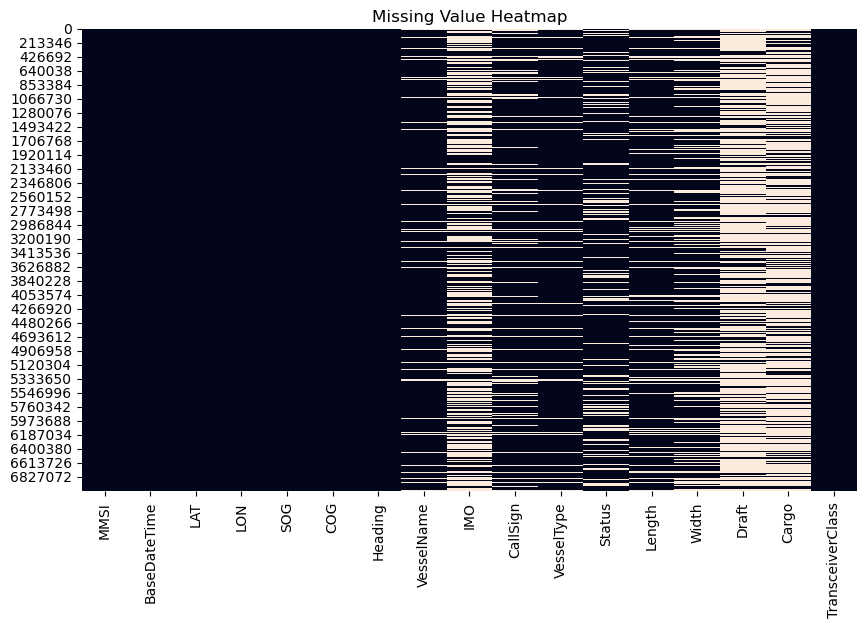

In [7]:
# ===== Missing Value Heatmap =====
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Value Heatmap")
plt.show()

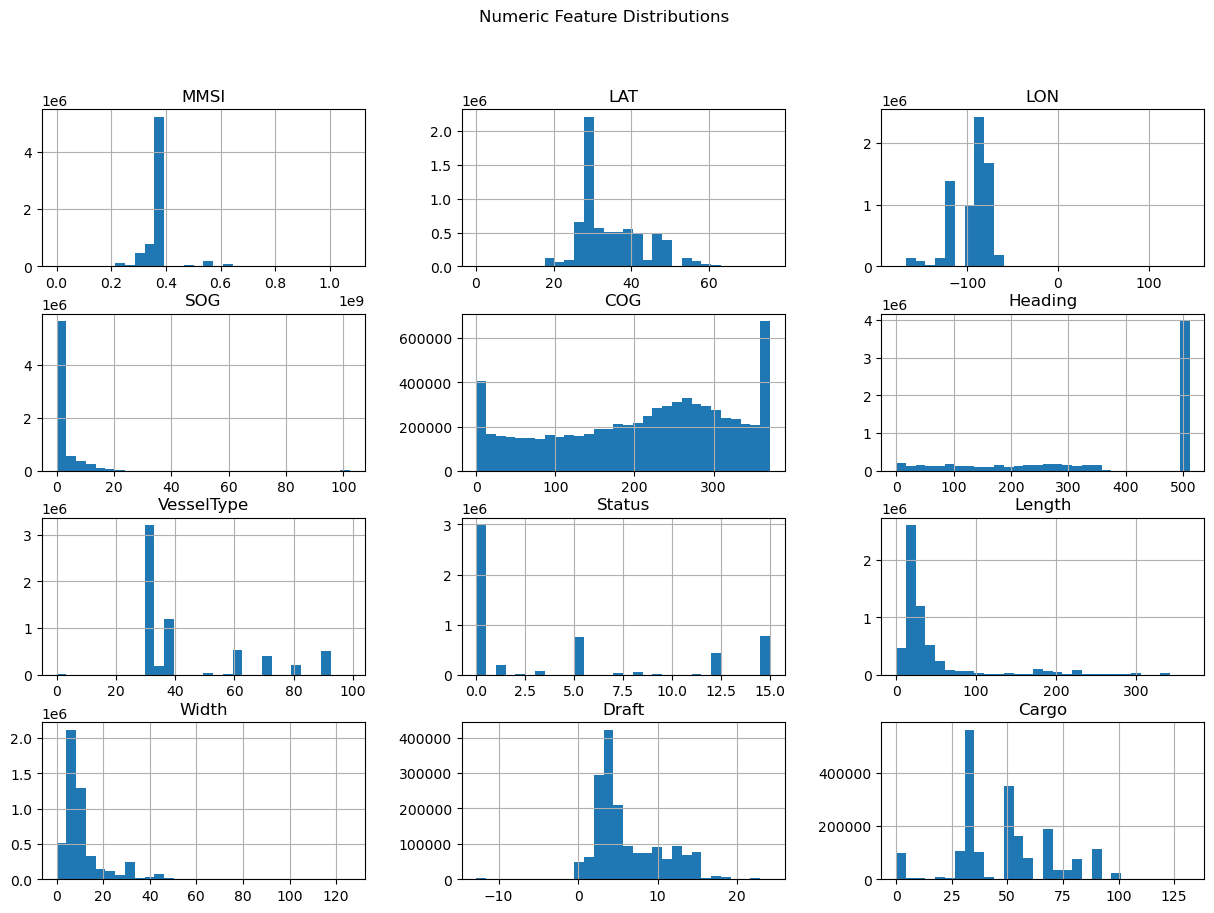

In [8]:
# ===== Distribution Checks =====
numeric_cols = df.select_dtypes(include=['float64','int64']).columns
df[numeric_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Numeric Feature Distributions")
plt.show()

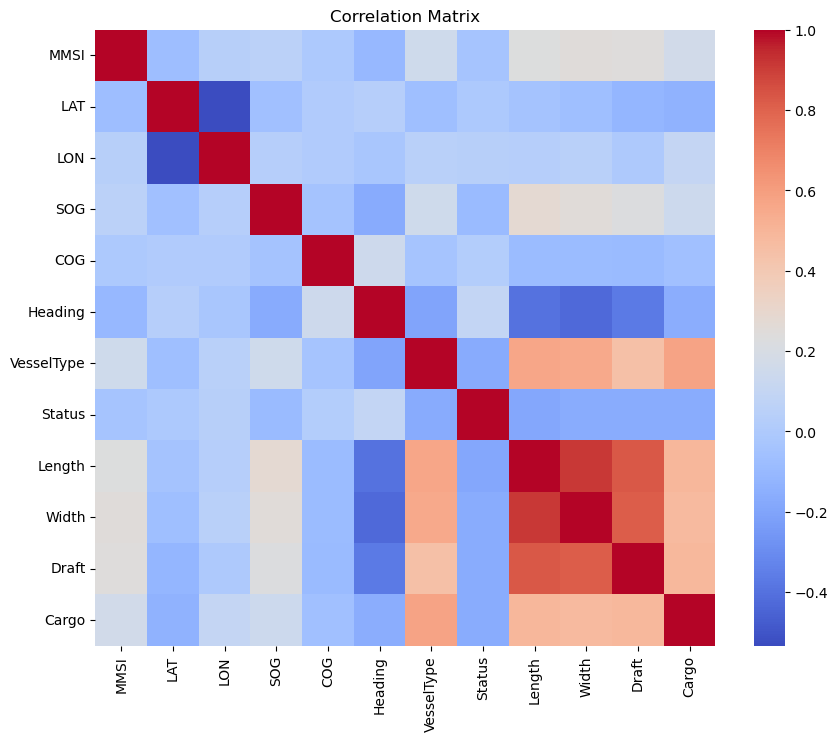

In [9]:
# ===== Correlation Matrix =====
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Matrix")
plt.show()

In [10]:
# ===== MMSI-level summaries =====
mmsi_group = df.groupby("MMSI").agg({
    "LAT": ["mean", "min", "max"],
    "LON": ["mean", "min", "max"],
    "SOG": ["mean", "max"],
    "COG": ["mean"],
    "VesselType": "first",
    "Status": "nunique"
})
print("\nMMSI Group Summary:\n", mmsi_group.head())


MMSI Group Summary:
               LAT                            LON                      \
             mean       min       max       mean       min       max   
MMSI                                                                   
11      27.292230  27.29212  27.29229 -90.967870 -90.96793 -90.96779   
18      27.850547  27.85040  27.85075 -97.236294 -97.23641 -97.23606   
4910    17.699811  17.69836  17.70026 -64.744227 -64.74519 -64.74163   
270995  35.097582  35.09731  35.10722 -90.099362 -90.10041 -90.08248   
507027  37.006437  37.00632  37.00656 -76.256746 -76.25735 -76.25617   

             SOG              COG VesselType  Status  
            mean  max        mean      first nunique  
MMSI                                                  
11      0.016667  0.1  275.216667        NaN       1  
18      0.000213  0.1  258.283369        NaN       1  
4910    0.204027  2.0  159.739597        0.0       1  
270995  0.114230  7.7  260.397386        NaN       1  
507027  0.136896

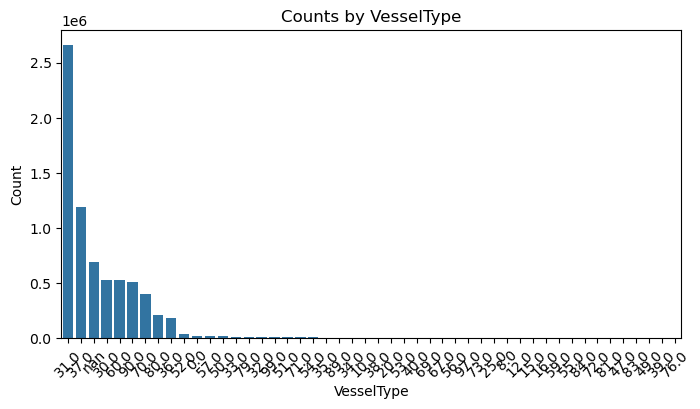

In [11]:
# ===== VesselType grouping =====
if "VesselType" in df.columns:
    vessel_counts = df["VesselType"].value_counts(dropna=False)
    plt.figure(figsize=(8,4))
    sns.barplot(x=vessel_counts.index.astype(str), y=vessel_counts.values)
    plt.title("Counts by VesselType")
    plt.xlabel("VesselType")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

In [12]:
# ===== Status overview =====
if "Status" in df.columns:
    print("\nStatus Value Counts:\n", df["Status"].value_counts(dropna=False))


Status Value Counts:
 Status
0.0     2982283
NaN     1626639
15.0     771391
5.0      766732
12.0     431713
1.0      203074
3.0       88010
8.0       60711
7.0       43707
11.0      25251
2.0       11732
9.0       10332
10.0       8591
4.0        5468
13.0       4354
6.0         401
Name: count, dtype: int64
